# Open and visualize the data

In [1]:
import pandas as pd
import datetime

In [4]:
PATH_CSV="/Users/iris/Documents/radar_deep/Radar_Traffic_Counts.csv"

In [91]:
df=pd.read_csv(PATH_CSV,parse_dates=[3,4,5,9])

In [92]:
df.head()

,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
0,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018-01-01,1,23,2,22,15,2020-11-15 22:15:00,None,4
1,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.785660,2017-01-01,12,16,6,19,45,2020-11-15 19:45:00,NB,103
2,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018-01-01,1,23,2,21,45,2020-11-15 21:45:00,SB,44
3,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018-01-01,1,23,2,21,45,2020-11-15 21:45:00,NB,13
4,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018-01-01,1,23,2,22,15,2020-11-15 22:15:00,None,0


In [61]:
#df["datetime_time"]=df.apply(lambda x: datetime.datetime(x.Year,x.Month,x.Day,x.Hour,x.Minute),axis=1)

In [93]:
df.columns

Index(['location_name', 'location_latitude', 'location_longitude', 'Year',
       'Month', 'Day', 'Day of Week', 'Hour', 'Minute', 'Time Bin',
       'Direction', 'Volume'],
      dtype='object')

In [94]:
df["Time Bin"].unique()[:10]

array(['2020-11-15T22:15:00.000000000', '2020-11-15T19:45:00.000000000',
       '2020-11-15T21:45:00.000000000', '2020-11-15T19:30:00.000000000',
       '2020-11-15T22:00:00.000000000', '2020-11-15T21:00:00.000000000',
       '2020-11-15T22:30:00.000000000', '2020-11-15T22:45:00.000000000',
       '2020-11-15T23:00:00.000000000', '2020-11-15T10:45:00.000000000'],
      dtype='datetime64[ns]')

In [65]:
print(df['location_name'].unique().shape)
radar1=df['location_name'].unique()[0]

(23,)


In [12]:
radar1

'2021 BLK KINNEY AVE (NW 300ft NW of Lamar)'

In [25]:
df[["Day","Month","Year"]][df['location_name']==radar1] #we can seet we have data for each 

,Day,Month,Year
0,23,1,2018
4,23,1,2018
21,23,1,2018
67,23,1,2018
68,23,1,2018
...,...,...,...
1483732,12,9,2017
1483821,12,9,2017
1483822,12,9,2017
1483823,12,9,2017


In [95]:
df["Time Bin"][df['location_name']==radar1].unique()

array(['2020-11-15T22:15:00.000000000', '2020-11-15T22:00:00.000000000',
       '2020-11-15T22:30:00.000000000', '2020-11-15T22:45:00.000000000',
       '2020-11-15T23:00:00.000000000', '2020-11-15T23:15:00.000000000',
       '2020-11-15T23:30:00.000000000', '2020-11-15T23:45:00.000000000',
       '2020-11-15T11:15:00.000000000', '2020-11-15T00:00:00.000000000',
       '2020-11-15T00:15:00.000000000', '2020-11-15T00:30:00.000000000',
       '2020-11-15T00:45:00.000000000', '2020-11-15T01:15:00.000000000',
       '2020-11-15T01:00:00.000000000', '2020-11-15T11:00:00.000000000',
       '2020-11-15T01:30:00.000000000', '2020-11-15T02:00:00.000000000',
       '2020-11-15T01:45:00.000000000', '2020-11-15T02:15:00.000000000',
       '2020-11-15T02:30:00.000000000', '2020-11-15T02:45:00.000000000',
       '2020-11-15T03:00:00.000000000', '2020-11-15T11:30:00.000000000',
       '2020-11-15T03:15:00.000000000', '2020-11-15T03:30:00.000000000',
       '2020-11-15T03:45:00.000000000', '2020-11-15

In [120]:
sub_df=df[["Time Bin","Direction","Volume"]][(df['location_name']==radar1)]

In [121]:
sub_df

,Time Bin,Direction,Volume
0,2020-11-15 22:15:00,None,4
4,2020-11-15 22:15:00,None,0
21,2020-11-15 22:15:00,None,3
67,2020-11-15 22:00:00,None,4
68,2020-11-15 22:00:00,None,1
...,...,...,...
1483732,2020-11-15 10:45:00,None,5
1483821,2020-11-15 10:30:00,None,12
1483822,2020-11-15 10:30:00,None,2
1483823,2020-11-15 10:30:00,None,5


In [122]:
datetime.date(2018,1,23)

datetime.date(2018, 1, 23)

In [103]:
print(type(sub_df["Time Bin"].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [114]:
pd.Timestamp(year=2018,month=1,day=23,unit="D").date()

datetime.date(2018, 1, 23)

In [125]:
sub_df.rename({"Time Bin":"date"})

,Time Bin,Direction,Volume
0,2020-11-15 22:15:00,None,4
4,2020-11-15 22:15:00,None,0
21,2020-11-15 22:15:00,None,3
67,2020-11-15 22:00:00,None,4
68,2020-11-15 22:00:00,None,1
...,...,...,...
1483732,2020-11-15 10:45:00,None,5
1483821,2020-11-15 10:30:00,None,12
1483822,2020-11-15 10:30:00,None,2
1483823,2020-11-15 10:30:00,None,5


In [126]:
sub_df

,Time Bin,Direction,Volume
0,2020-11-15 22:15:00,None,4
4,2020-11-15 22:15:00,None,0
21,2020-11-15 22:15:00,None,3
67,2020-11-15 22:00:00,None,4
68,2020-11-15 22:00:00,None,1
...,...,...,...
1483732,2020-11-15 10:45:00,None,5
1483821,2020-11-15 10:30:00,None,12
1483822,2020-11-15 10:30:00,None,2
1483823,2020-11-15 10:30:00,None,5


In [119]:
sub_df.apply(lambda x: x["Time Bin"].date())

KeyError: 'Time Bin'

In [115]:
sub_df[sub_df.apply(lambda x: x["Time Bin"].date()]pd.Timestamp(year=2018,month=1,day=23).date()]

AttributeError: 'Series' object has no attribute 'date'

In [70]:
sub_df.sort_values("datetime_time")

,datetime_time,Direction,Volume
607469,2017-07-23 00:00:00,None,51
607468,2017-07-23 00:00:00,None,50
607458,2017-07-23 00:00:00,SB,20
607459,2017-07-23 00:00:00,SB,41
607461,2017-07-23 00:00:00,NB,46
...,...,...,...
3748650,2019-10-23 23:45:00,NB,33
3748651,2019-10-23 23:45:00,SB,41
3748652,2019-10-23 23:45:00,SB,43
3748646,2019-10-23 23:45:00,None,33


In [ ]:
# It seems that some radar has collect data with no direction ...


In [39]:
sub_df[(sub_df["Direction"]=="SB")|(sub_df["Hour"]==21)]

,Hour,Minute,Time Bin,Direction,Volume
2,21,45,21:45,SB,44
3,21,45,21:45,NB,13
5,22,15,22:15,SB,26
6,22,15,22:15,SB,31
7,22,15,22:15,SB,12
...,...,...,...,...,...
4603724,5,45,05:45,SB,19
4603727,5,0,05:00,SB,1
4603728,0,0,00:00,SB,0
4603810,9,0,09:00,SB,20


<AxesSubplot:xlabel='Time Bin'>

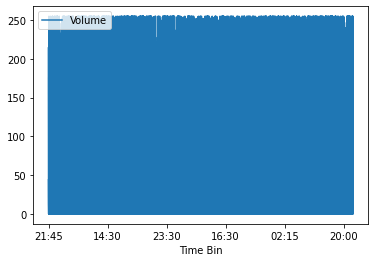

In [36]:
sub_df[(sub_df["Direction"]=="SB")].plot(x="Time Bin",y="Volume")